In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

If you have multiple massSample and membership files, you need to combine them first via e.g.,
```
paste -d" " *.membership > cluster.membership
paste -d" " *.massSamples > cluster.massSamples
```

In [2]:
sm = "/Users/annachilds/myBASE9/getGaiaData/M67_old/cluster.massSamples"
mem = "/Users/annachilds/myBASE9/getGaiaData/M67_old/cluster.membership"
ph = "/Users/annachilds/myBASE9/getGaiaData/M67_old/NGC_2682.phot"

In [3]:
phot = pd.read_csv(ph)
phot['m1Mean'] = -1
phot['m1Std'] = -1
phot['m2Mean'] = -1
phot['m2Std'] = -1
phot['qMean'] = -1
phot['qStd'] = -1
phot['memMean'] = -1
phot['memStd'] = -1
phot['member'] = False
phot['binary'] = False
phot


,id g_ps r_ps i_ps z_ps y_ps sigg_ps sigr_ps sigi_ps sigz_ps sigy_ps mass1 massRatio stage1 CMprior useDBI,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,1931001 99.9000 99.9000 99.9000 99.9000 99.900...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1,1588002 99.9000 99.9000 99.9000 99.9000 99.900...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2,1824003 99.9000 99.9000 99.9000 99.9000 99.900...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
3,1788004 99.9000 99.9000 99.9000 99.9000 99.900...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
4,1106005 99.9000 99.9000 99.9000 99.9000 99.900...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...
943,1811944 22.0170 20.9435 19.6035 18.9568 18.692...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
944,1758945 22.0340 21.0380 19.6081 18.9360 18.575...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
945,1717946 21.9887 20.6817 19.2905 18.6713 18.360...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
946,1918947 22.3751 21.0918 19.8142 19.2241 18.851...,-1,-1,-1,-1,-1,-1,-1,-1,False,False


In [58]:
# should we exclude all the rows with negative sig values?
# no, we should probably include them since they are in the cluster
#
# phot = phot.loc[(phot['sigg_ps'] > 0) & (phot['sigr_ps'] > 0) & (phot['sigi_ps'] > 0) \
#                 & (phot['sigz_ps'] > 0) & (phot['sigy_ps'] > 0)]
# phot

In [4]:
# get the names for the masses
massesNames = np.loadtxt(sm,max_rows = 1, dtype=str)
massesNames = np.char.replace(massesNames,'mass','')
massesNames = np.char.replace(massesNames,'ratio','')
massesNames

array(['"1157021', '"1157021', '"1051022', ..., '"1918947', '"1918947',
       ''], dtype='<U8')

In [5]:
# get the masses
masses = np.loadtxt(sm,skiprows=1)
print(masses.shape)
print(masses.shape[1]/2.)

(11750, 1822)
911.0


In [6]:
# get the memberships 
membership = np.loadtxt(mem)
print(membership.shape)

(11750, 911)


In [7]:
#calculate the binary fraction
nBinary = 0
nCluster = 0
for i in range(0,masses.shape[1],2):
    # get the row in the phot file
    iden = int(massesNames[i])
    row = phot.loc[(phot['newID'] == iden)]
    #print(row['newID'])
    
    # get the column in the membership file
    imem = int(i/2)
    memArr = membership[:,imem]
    memMean = np.mean(memArr)
    memStd = np.std(memArr)
    
    # add to the phot df
    phot.at[row.index[0], 'memMean'] = memMean
    phot.at[row.index[0], 'memStd'] = memStd
    
    if (memMean - 3*memStd > 0):
        phot.at[row.index[0], 'member'] = True

        nCluster += 1
        
        # get the masses
        m1Arr = masses[:,i]
        qArr = masses[:,(i + 1)]
        m2Arr = m1Arr*qArr
        m2Mean = np.mean(m2Arr)
        m2Std = np.std(m2Arr)
        qMean = np.mean(qArr)
        qStd = np.std(qArr)
        
        # add to the phot df masses (to do)
        phot.at[row.index[0], 'qMean'] = qMean
        phot.at[row.index[0], 'qStd'] = qStd
    
        if (m2Mean - 3*m2Std > 0):
            nBinary += 1
            phot.at[row.index[0], 'binary'] = True

            
    #print(m1Arr)   
print(nBinary, nCluster, nBinary/nCluster, np.sqrt(nBinary)/nCluster)

ValueError: invalid literal for int() with base 10: '"1157021'

In [8]:
phot

,id g_ps r_ps i_ps z_ps y_ps sigg_ps sigr_ps sigi_ps sigz_ps sigy_ps mass1 massRatio stage1 CMprior useDBI,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,1931001 99.9000 99.9000 99.9000 99.9000 99.900...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1,1588002 99.9000 99.9000 99.9000 99.9000 99.900...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2,1824003 99.9000 99.9000 99.9000 99.9000 99.900...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
3,1788004 99.9000 99.9000 99.9000 99.9000 99.900...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
4,1106005 99.9000 99.9000 99.9000 99.9000 99.900...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...
943,1811944 22.0170 20.9435 19.6035 18.9568 18.692...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
944,1758945 22.0340 21.0380 19.6081 18.9360 18.575...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
945,1717946 21.9887 20.6817 19.2905 18.6713 18.360...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
946,1918947 22.3751 21.0918 19.8142 19.2241 18.851...,-1,-1,-1,-1,-1,-1,-1,-1,False,False


KeyError: 'g_ps'

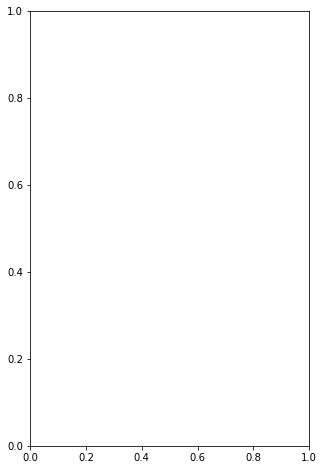

In [9]:
f, ax = plt.subplots(figsize=(5,8))
photMems = phot.loc[phot['member']]
photBinary = phot.loc[phot['binary']]
ax.plot(phot['g_ps'] - phot['i_ps'], phot['g_ps'],'.', color='gray')
ax.plot(photMems['g_ps'] - photMems['i_ps'], photMems['g_ps'],'.', color='magenta')
ax.plot(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'],'.', color='blue')
ax.set_xlim(0, 2.5)
ax.set_ylim(22, 13)

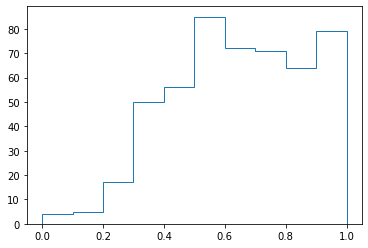

In [104]:
f, ax = plt.subplots()
photBinary = phot.loc[phot['binary']]
_ = ax.hist(photBinary['qMean'], histtype='step', bins=10, range=[0,1])

In [ ]:
# from Erin Motherway
# plot CMD with a colorbar showing mass ratio

r = photBinary['qMean']
f, ax = plt.subplots(figsize=(6,10))
ax.set_xlabel('g_ps - i_ps',fontsize=20)
ax.set_ylabel('g_ps',fontsize=20)
#plot phot and cluster members
plt.scatter(phot['g_ps'] - phot['i_ps'], phot['g_ps'],s=25, color='#A0A0A0')
#plt.scatter(photMems['g_ps'] - photMems['i_ps'], photMems['g_ps'],s=20, color='lightpink')
#plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], color='#000000')
ax.set_xlim(0, 3)
ax.set_ylim(23, 12)
#plot colorbar
plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], s=35, c=r, cmap=plt.cm.get_cmap("viridis"),edgecolors= "black",linewidth=0.75)
plt.colorbar(label="Mass Ratio", orientation="horizontal",pad=0,location='top')
plt.show()